# **Experiment 5: Image Enhancement**
Develop a Python program using OpenCV to enhance the quality of a digital image by applying
spatial domain filtering techniques such as smoothing and sharpening

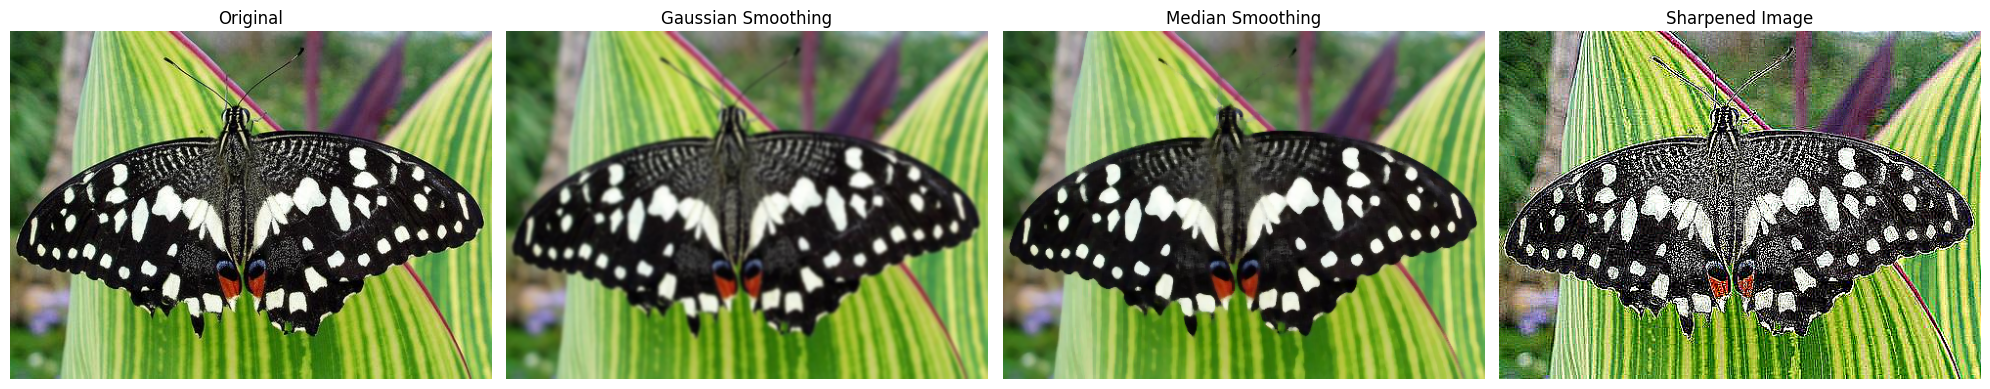

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow

# 1. Load the image
!wget -q -O input.jpg https://raw.githubusercontent.com/opencv/opencv/master/samples/data/butterfly.jpg
image = cv2.imread('input.jpg')
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# --- 2. SMOOTHING (Noise Reduction) ---
# Gaussian Blur: Weighted average of neighbors (good for general noise)
gaussian_blur = cv2.GaussianBlur(image_rgb, (7, 7), 0)

# Median Blur: Replaces pixel with the median of its neighbors (excellent for salt-and-pepper noise)
median_blur = cv2.medianBlur(image_rgb, 5)

# --- 3. SHARPENING (Detail Enhancement) ---
# We create a sharpening kernel (Laplacian-based)
# The center is high, and neighbors are negative to emphasize differences
kernel_sharpening = np.array([[-1, -1, -1],
                              [-1,  9, -1],
                              [-1, -1, -1]])

sharpened = cv2.filter2D(image_rgb, -1, kernel_sharpening)

# 4. Visualization
plt.figure(figsize=(20, 10))

titles = ['Original', 'Gaussian Smoothing', 'Median Smoothing', 'Sharpened Image']
images = [image_rgb, gaussian_blur, median_blur, sharpened]

for i in range(4):
    plt.subplot(1, 4, i+1)
    plt.imshow(images[i])
    plt.title(titles[i])
    plt.axis('off')

plt.tight_layout()
plt.show()